In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

try:
    df = pd.read_csv("./../data/benin.csv", parse_dates=["Timestamp"])
    # df.head()
except FileNotFoundError:
    print("File 'data/benin.csv' not found.")


In [2]:
df.describe()
df.isna().sum().sort_values(ascending=False)


Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [3]:
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

print(outliers)


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


Text(0.5, 1.0, 'Time Series of Solar Irradiance and Temperature')

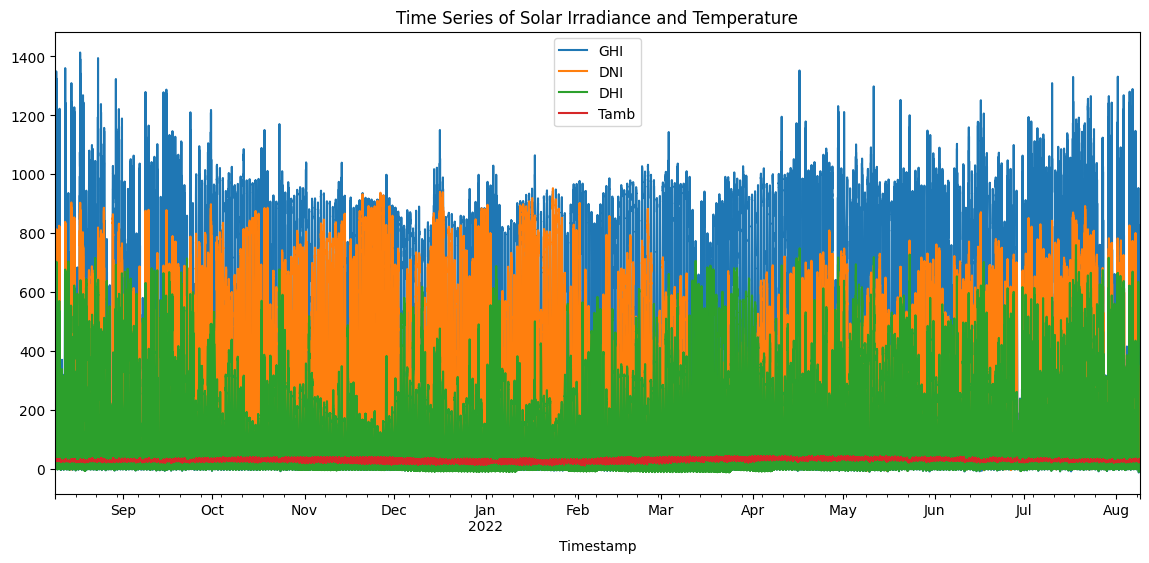

In [4]:
import matplotlib.pyplot as plt

df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(14,6))
plt.title("Time Series of Solar Irradiance and Temperature")


<Axes: >

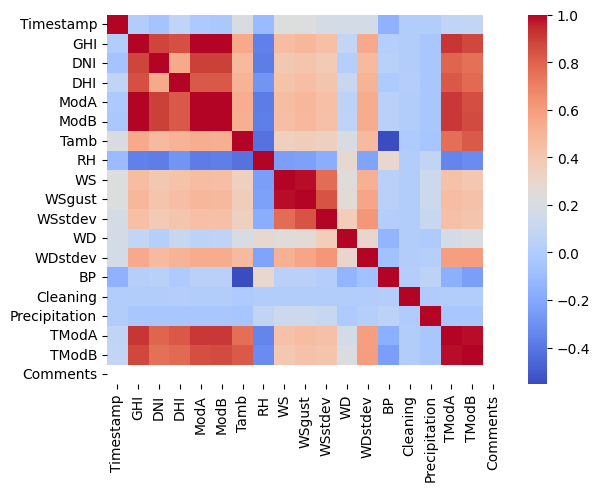

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), cmap="coolwarm")

# Example scatter
# sns.scatterplot(data=df, x="WS", y="GHI")


<Axes: >

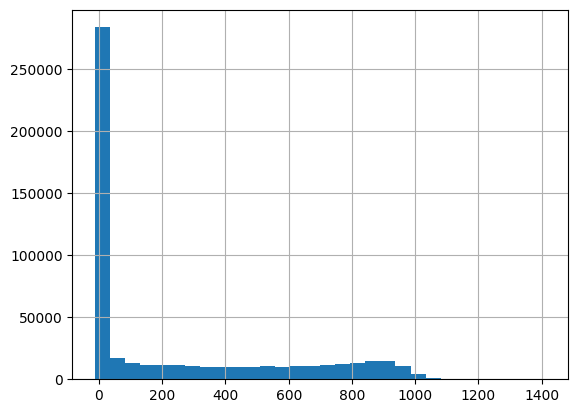

In [6]:
df["GHI"].hist(bins=30)


Text(0, 0.5, 'GHI')

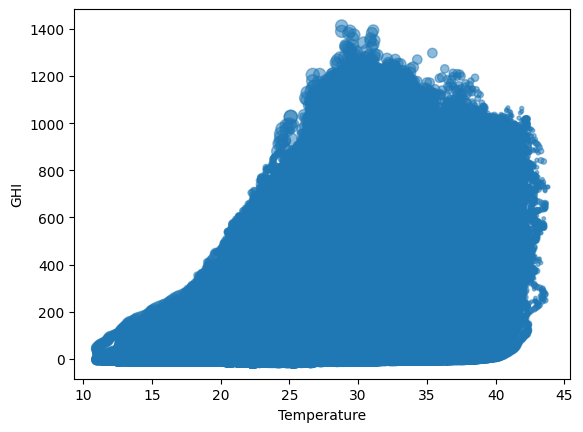

In [7]:
plt.scatter(df["Tamb"], df["GHI"], s=df["RH"], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("GHI")


In [9]:
# 📁 Save Clean Data
# If you want to save the original df as clean data, use df instead of df_clean
df.to_csv("../data/benin_clean.csv", index=False)